In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from icecream import ic

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


#### Import key API code idea from Nicole Lund. Shared in UofA-PHX-VIRT-DATA-PT-03-2021, Slack: Resources Channel

In [2]:

# Import API key
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
    from api_keys_v2 import weather_api_key


In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

#### Code above was provided in the assignment

#### Created base URL and established the units. Also created the dataframe where data will be stored. Unites used will be metric.

In [5]:

base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = 'metric'
weather_df=pd.DataFrame({'cities': cities})

weather_df.head()

,cities
0,souillac
1,balikpapan
2,saint anthony
3,atuona
4,nome


#### Initiated the rest of the columns for the dataframe.

In [6]:
weather_df['lat'] = ""
weather_df['lng'] = ""
weather_df['temp'] = ""
weather_df['humidity'] = ""
weather_df['cloudiness'] = ""
weather_df['wind'] = ""
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,souillac,,,,,,
1,balikpapan,,,,,,
2,saint anthony,,,,,,
3,atuona,,,,,,
4,nome,,,,,,


#### For loop to iterate the datafame rows and populate them with the data from the response. The exception also populates the empty column values with NaN values. (Modified from https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python)

In [7]:
for index, row in weather_df.iterrows():
    # count+=1
    city = row['cities']
    cities_found = []
    
    print(f'Retrieving results for Index {index}: {city}')
    try:
        response = requests.get(base_url+city+"&units="+units+'&appid=' + weather_api_key).json()
        weather_df.loc[index, 'lat'] = response['coord']['lat']
        weather_df.loc[index, 'lng'] = response['coord']['lon']
        weather_df.loc[index, 'temp'] = response['main']['temp']
        weather_df.loc[index, 'humidity'] = response['main']['humidity']
        weather_df.loc[index, 'cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'wind'] = response['wind']['speed']
        cities_found.append(city)

        print(f'Found city: {city}')
    except:
        print(f"Missing city: {city}... Skipping")
        weather_df.loc[index, 'lat'] = float('NaN')
        weather_df.loc[index, 'lng'] = float('NaN')
        weather_df.loc[index, 'temp'] = float('NaN')
        weather_df.loc[index, 'humidity'] = float('NaN')
        weather_df.loc[index, 'cloudiness'] = float('NaN')
        weather_df.loc[index, 'wind'] = float('NaN')
    print(f'--------------------')
   

Retrieving results for Index 0: souillac
Found city: souillac
--------------------
Retrieving results for Index 1: balikpapan
Found city: balikpapan
--------------------
Retrieving results for Index 2: saint anthony
Found city: saint anthony
--------------------
Retrieving results for Index 3: atuona
Found city: atuona
--------------------
Retrieving results for Index 4: nome
Found city: nome
--------------------
Retrieving results for Index 5: cidreira
Found city: cidreira
--------------------
Retrieving results for Index 6: punta arenas
Found city: punta arenas
--------------------
Retrieving results for Index 7: santa isabel do rio negro
Found city: santa isabel do rio negro
--------------------
Retrieving results for Index 8: rikitea
Found city: rikitea
--------------------
Retrieving results for Index 9: tuatapere
Found city: tuatapere
--------------------
Retrieving results for Index 10: ribeira grande
Found city: ribeira grande
--------------------
Retrieving results for Index 1

#### Dataframe check to ensure all columns are populated properly.

In [8]:
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,souillac,-20.5167,57.5167,25,88,75,4.63
1,balikpapan,-1.2675,116.829,29.32,63,74,3.53
2,saint anthony,45.0205,-93.218,7.18,81,90,2.06
3,atuona,-9.8,-139.033,26.84,77,22,10.68
4,nome,64.5011,-165.406,3.15,70,1,1.2


#### Drop rows with na values that were added in the dataframe above.

In [9]:
weather_df.dropna(inplace=True)
weather_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
0,souillac,-20.5167,57.5167,25,88,75,4.63
1,balikpapan,-1.2675,116.829,29.32,63,74,3.53
2,saint anthony,45.0205,-93.218,7.18,81,90,2.06
3,atuona,-9.8,-139.033,26.84,77,22,10.68
4,nome,64.5011,-165.406,3.15,70,1,1.2
5,cidreira,-30.1811,-50.2056,20.66,83,1,6.77
6,punta arenas,-53.15,-70.9167,5.78,93,75,1.03
7,santa isabel do rio negro,-0.4139,-65.0192,23.21,97,85,0.88
8,rikitea,-23.1203,-134.969,26.08,75,100,6.66
9,tuatapere,-46.1333,167.683,12.22,75,49,2.68


#### Save dataframe as csv

In [10]:
weather_df.to_csv(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/LearnPython/python-api-challenge/WeatherPy/all_weather.csv",header=True, index=False)

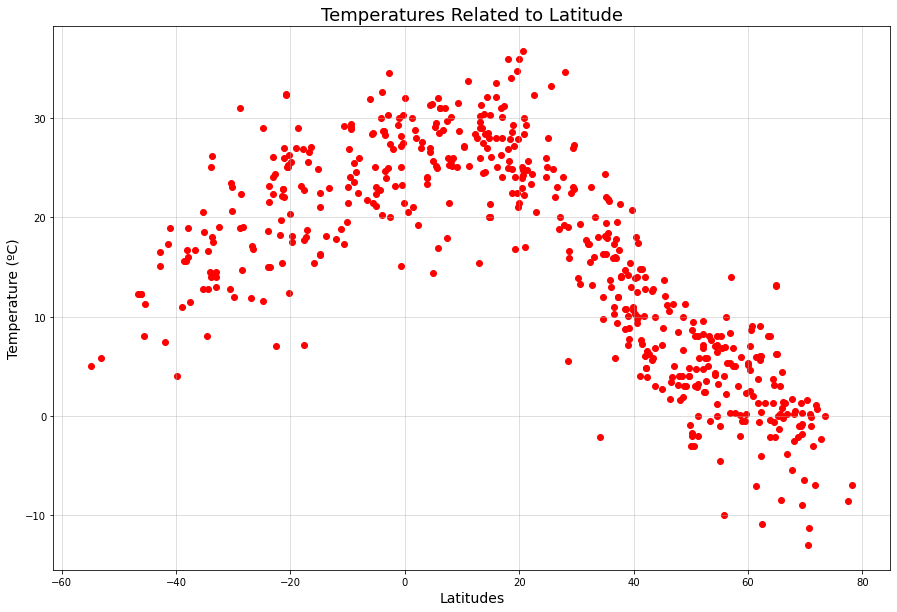

In [11]:
plt.figure(figsize=(15,10))
y_axis = weather_df['temp']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='r')
plt.grid(True, alpha=0.5)
plt.ylabel('Temperature (ºC)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Temperatures Related to Latitude", size=18)
plt.savefig('temp_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

#### Scatterplot above shows how the temperature is distributed across latitudes for the samples selected. As expected, the data behaves in a unimodal way with the highest temperatures concentrating near the tropics. Additionally, the left tail of the distribution contains overall temperatures that are higher than the right tail of the data. This is easily explains by the southern hemisphere being in summer/fall transition while the northern hemisphere is in winter/spring transition.

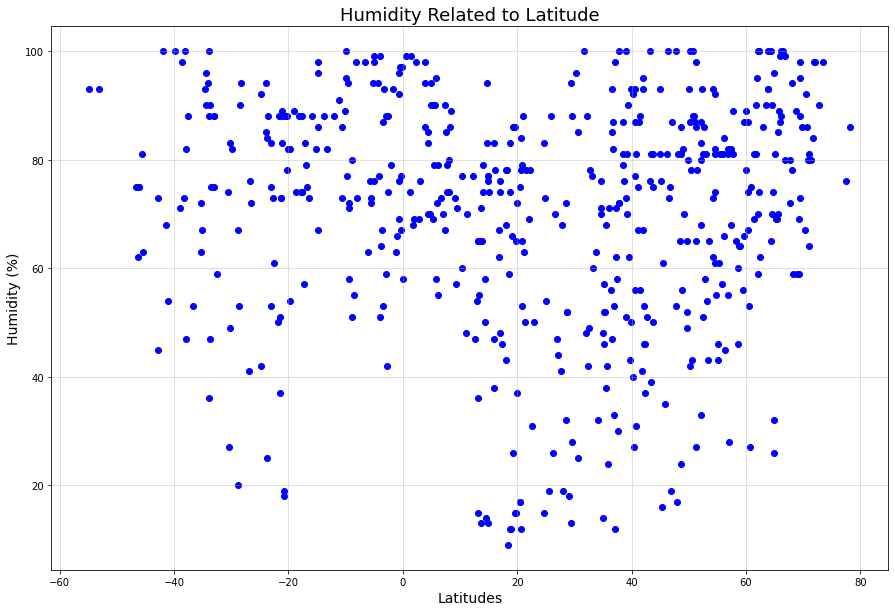

In [12]:
plt.figure(figsize=(15,10))
y_axis = weather_df['humidity']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='b')
plt.grid(True, alpha=0.5)
plt.ylabel('Humidity (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Humidity Related to Latitude", size=18)
plt.savefig('hum_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

#### Scatterplot above shows how the humidity is distributed across latitudes for the samples selected. Humidity does not appear to be influenced by latitude.

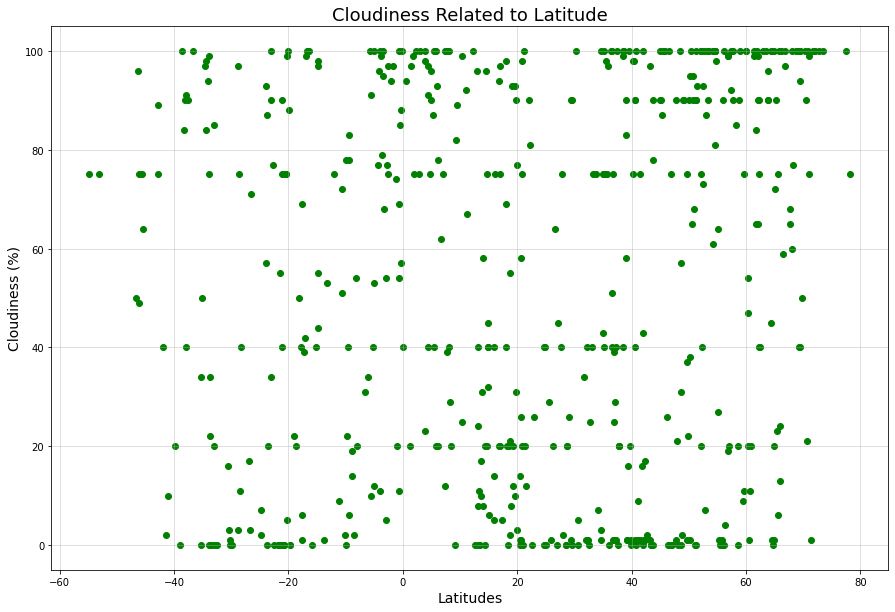

In [13]:
plt.figure(figsize=(15,10))
y_axis = weather_df['cloudiness']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='g')
plt.grid(True, alpha=0.5)
plt.ylabel('Cloudiness (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Cloudiness Related to Latitude", size=18)
plt.savefig('cloud_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

#### Scatterplot above shows how cloud coverage is distributed across latitudes for the sample selected. This parameter does not appear to be influenced by latitude.

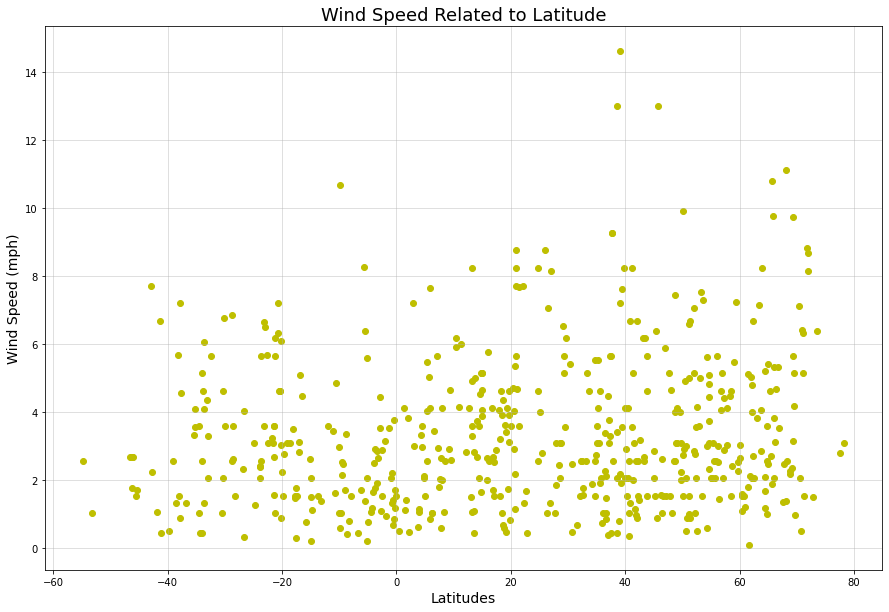

In [14]:
plt.figure(figsize=(15,10))
y_axis = weather_df['wind']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='y')
plt.grid(True, alpha=0.5)
plt.ylabel('Wind Speed (mph)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Wind Speed Related to Latitude", size=18)
plt.savefig('wind_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

#### Scatterplot above shows how wind speed is distributed across latitudes for the sample selected. This parameter does not appear to be influenced by latitude.

#### Below, the orginal weather dataframe was filtered for latitudes higher or equal to 0. This is the data for the northern hemisphere.

In [15]:
north_hemi_df = weather_df[(weather_df.lat>=0)]
north_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
2,saint anthony,45.0205,-93.218,7.18,81,90,2.06
4,nome,64.5011,-165.406,3.15,70,1,1.2
10,ribeira grande,38.5167,-28.7,14.71,79,99,12.99
11,barcelos,41.5388,-8.6151,14.74,88,75,3.09
12,dzerzhinskoye,56.8344,95.2283,5.34,55,99,5.15
13,yar-sale,66.8333,70.8333,0.24,99,97,3.55
14,argelia,2.2556,-77.2488,19.17,98,100,0.48
15,kodiak,57.79,-152.407,5,81,90,4.12
21,torbay,47.6666,-52.7314,3.08,100,90,5.14
22,boa vista,2.8197,-60.6733,27,69,75,7.2


#### Northern hemisphere data was exported as csv.

In [16]:
weather_df.to_csv(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/LearnPython/python-api-challenge/WeatherPy/north_weather.csv",header=True, index=False)

#### Below, the orginal weather dataframe was filtered for latitudes lower than 0. This is the data for the northern hemisphere.

In [17]:
south_hemi_df = weather_df[(weather_df.lat<0)]
south_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
0,souillac,-20.5167,57.5167,25,88,75,4.63
1,balikpapan,-1.2675,116.829,29.32,63,74,3.53
3,atuona,-9.8,-139.033,26.84,77,22,10.68
5,cidreira,-30.1811,-50.2056,20.66,83,1,6.77
6,punta arenas,-53.15,-70.9167,5.78,93,75,1.03
7,santa isabel do rio negro,-0.4139,-65.0192,23.21,97,85,0.88
8,rikitea,-23.1203,-134.969,26.08,75,100,6.66
9,tuatapere,-46.1333,167.683,12.22,75,49,2.68
16,hithadhoo,-0.6,73.0833,28.14,69,54,1.42
17,busselton,-33.65,115.333,26.11,47,22,1.34


#### Northern hemisphere data was exported as csv.

In [18]:
weather_df.to_csv(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/LearnPython/python-api-challenge/WeatherPy/south_weather.csv",header=True, index=False)

The line equation is y = -0.5 x + 32.75
The r-squared is: 0.80


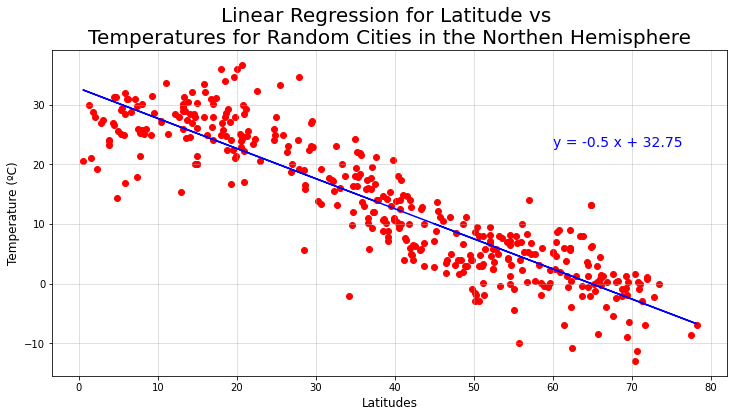

In [19]:
x_axis = north_hemi_df["lat"].astype(float) 
y_axis = north_hemi_df["temp"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='r')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(60, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Temperature (ºC)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nTemperatures for Random Cities in the Northen Hemisphere', size=20)
plt.savefig('temp_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

#### For the data above, in the northern hemisphere there is a negative correlation between latitude and temperature. The higher the latitude (closer to the North Pole), the lower the temperature will be. Additionally, about 80% of the variance can be explained by the model, meaning it might be a good model to predict values for temperature based on latitude input.

The line equation is y = 0.32 x + 27.43
The r-squared is: 0.46


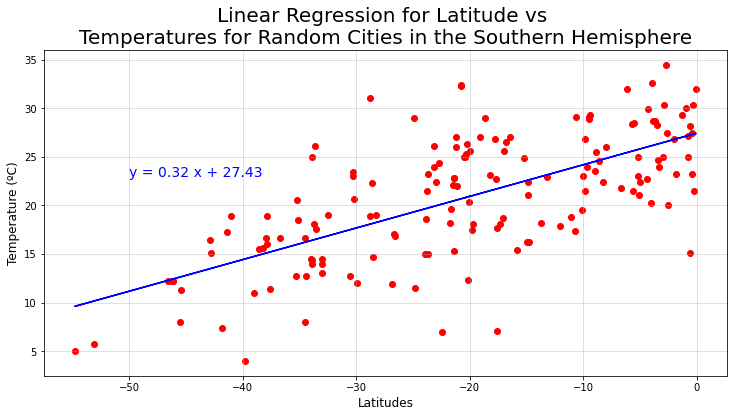

In [20]:
x_axis = south_hemi_df["lat"].astype(float) 
y_axis = south_hemi_df["temp"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='r')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Temperature (ºC)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nTemperatures for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('temp_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

#### For the data above, opposite to the northern hemisphere, there is a positive correlation between latitude and temperature. The lower the latitude (closer to the South Pole), the lower the temperature will be. Additionally, about 46% of the variance can be explained by the model. This does not appear to be as good of a model for predicting temperature as it is for the northern hemisphere.

The line equation is y = 0.21 x + 59.83
The r-squared is: 0.04


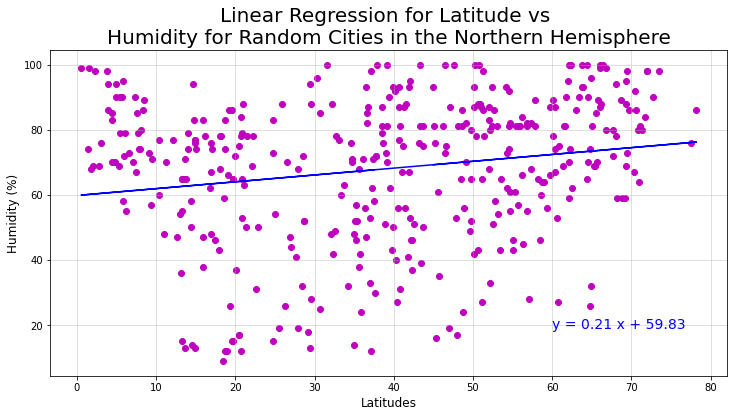

In [21]:
x_axis = north_hemi_df["lat"].astype(float) 
y_axis = north_hemi_df["humidity"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='m')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(60, 19, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nHumidity for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('hum_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")


#### For the data above, there is a slight positive correlation between latitude and humidity. However, only 4% of the variance can be explained by the model. This is not a good of a model for predicting humidity for the northern hemisphere.

The line equation is y = 0.12 x + 77.85
The r-squared is: 0.01


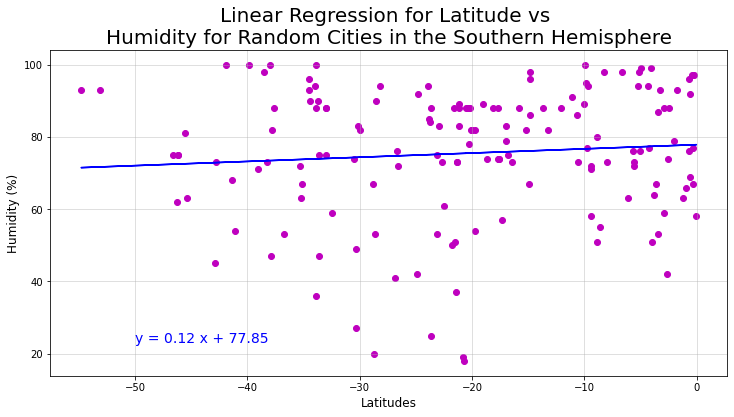

In [22]:
x_axis = south_hemi_df["lat"].astype(float) 
y_axis = south_hemi_df["humidity"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='m')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nHumidity for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('hum_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

#### For the data above, there is a slight positive correlation between latitude and humidity. However, only 1% of the variance can be explained by the model. This is not a good of a model for predicting humidity for the southern hemisphere.

The line equation is y = 0.33 x + 41.06
The r-squared is: 0.03


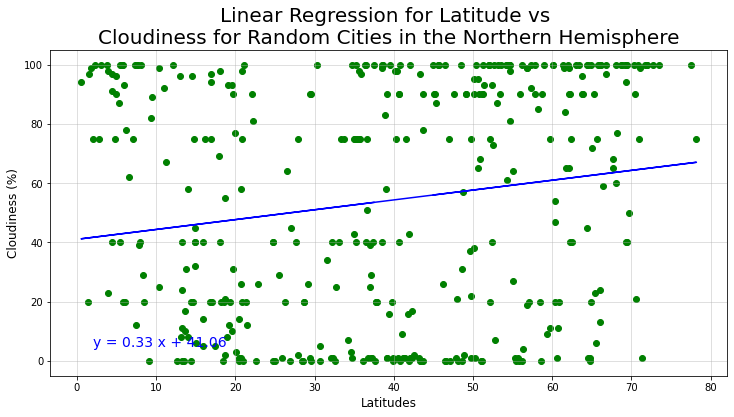

In [23]:
y_axis = north_hemi_df['cloudiness'].astype(float) 
x_axis = north_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='g')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(2, 5, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nCloudiness for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('cloud_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")


#### For the data above, there is a positive correlation between latitude and cloud coverage. However, only 3% of the variance can be explained by the model. This is not a good of a model for predicting cloud coverage for the northern hemisphere.

The line equation is y = 0.19 x + 53.87
The r-squared is: 0.00


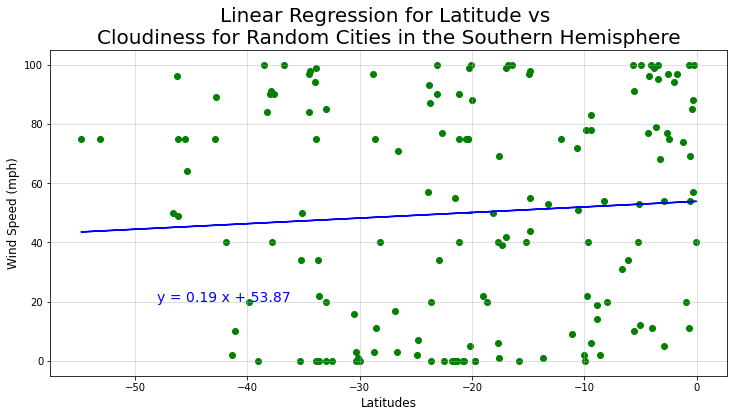

In [24]:
y_axis = south_hemi_df['cloudiness'].astype(float) 
x_axis = south_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='g')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-48, 20, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nCloudiness for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('cloud_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

#### For the data above, there is a slight positive correlation between latitude and cloud coverage. However, the variance cannot be explained by the model. This is not a good of a model for predicting cloud coverage for the southern hemisphere.

The line equation is y = 0.01 x + 3.14
The r-squared is: 0.01


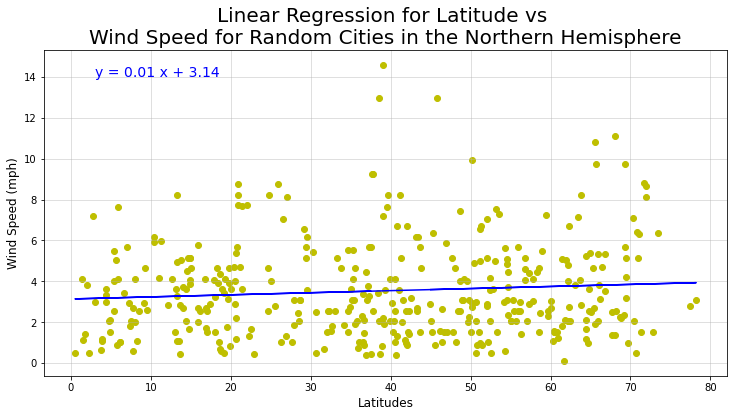

In [25]:
y_axis = north_hemi_df['wind'].astype(float) 
x_axis = north_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='y')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(3, 14, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nWind Speed for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('wind_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

#### For the data above, there is a marginally positive correlation between latitude and wind speed. However, only 1% of the variance can be explained by the model. This is not a good of a model for predicting wind speed for the northern hemisphere.

The line equation is y = -0.02 x + 2.46
The r-squared is: 0.02


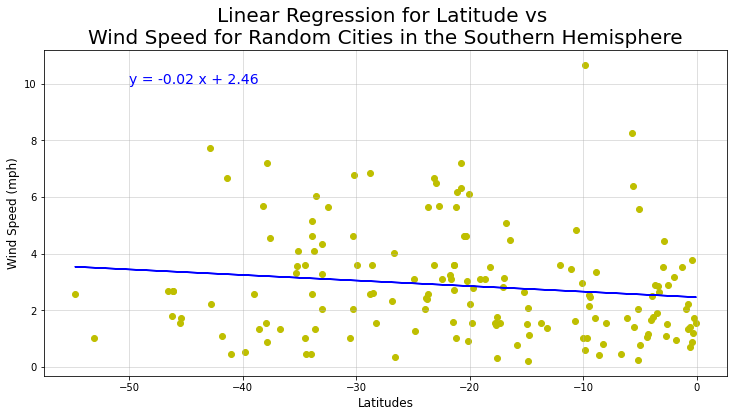

In [26]:
y_axis = south_hemi_df['wind'].astype(float) 
x_axis = south_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='y')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 10, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nWind Speed for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('wind_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

#### For the data above, there is a marginally negative correlation between latitude and wind speed. However, only 2% of the variance can be explained by the model. This is not a good of a model for predicting wind speed for the southern hemisphere.